In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load Data

In [2]:
dfDgt = pd.read_csv('handwriting_digits.csv')
dfDgt.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Set target and features
y = dfDgt['label']
X = scale(dfDgt.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
import matplotlib.pyplot as plt
print(plt.imshow(X[1].reshape((28,28))), '\t\t', y[0])

AxesImage(80,52.8;496x369.6) 		 1


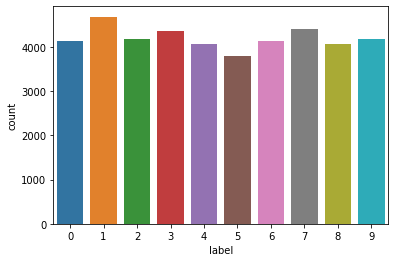

In [5]:
import seaborn as sns

sns.countplot(y)

# Build SVM model

In [8]:
%%time
from sklearn.svm import SVC

mdlSvmDgt = SVC()
mdlSvmDgt.fit(X_train, y_train)
y_test_pred = mdlSvmDgt.predict(X_test)

print('Classification Report (Support Vector Classifier):')
print(classification_report(y_test, y_test_pred))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       853
           1       0.98      0.99      0.98       940
           2       0.95      0.97      0.96       835
           3       0.96      0.94      0.95       873
           4       0.96      0.96      0.96       829
           5       0.96      0.95      0.95       731
           6       0.97      0.97      0.97       800
           7       0.91      0.97      0.94       850
           8       0.97      0.94      0.96       846
           9       0.96      0.92      0.94       843

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

CPU times: user 6min 35s, sys: 1.51 s, total: 6min 37s
Wall time: 6min 41s


#### This takes a while...

In [9]:
%%time
from sklearn.neural_network import MLPClassifier

mdlNncDgt = MLPClassifier()
mdlNncDgt.fit(X_train, y_train)
y_test_pred = mdlNncDgt.predict(X_test)

print('Classification Report (Neural Network):')
print(classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       853
           1       0.99      0.99      0.99       940
           2       0.97      0.96      0.96       835
           3       0.96      0.96      0.96       873
           4       0.97      0.97      0.97       829
           5       0.95      0.96      0.96       731
           6       0.97      0.98      0.98       800
           7       0.95      0.97      0.96       850
           8       0.97      0.94      0.96       846
           9       0.96      0.96      0.96       843

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

CPU times: user 50.4 s, sys: 3.78 s, total: 54.1 s
Wall time: 31.1 s


#### Now that was really fast...

In [15]:
# Load data for scoring

X_score = scale(pd.read_csv('handwriting_digits_score.csv'))

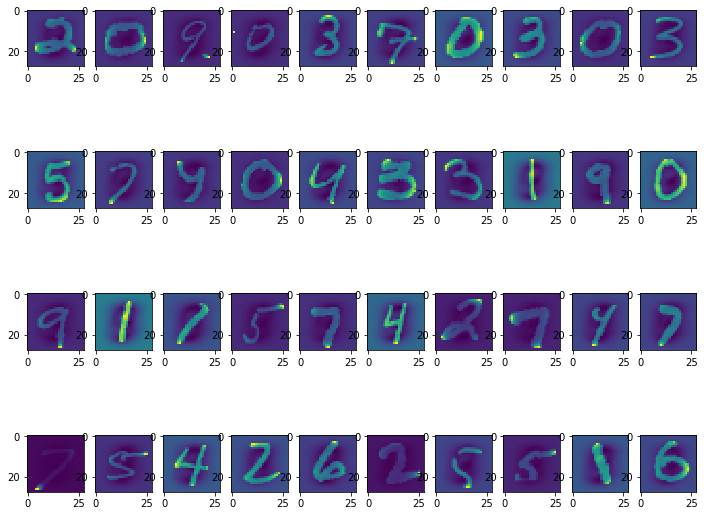

In [16]:
# View handwritten images

plt.figure(figsize=(12,10))
col, row = 10, 4

for i in range(col*row):
    plt.subplot(row,col, i+1)
    plt.imshow(X_score[i].reshape((28,28)))
    
plt.show()

In [22]:
# Show predicted digits

print('Predicted Digits (Neural Network):')
for i in range(col*row):
    if np.mod(i,col) == 0:
        print('\n')
    print(mdlNncDgt.predict(X_score)[i], end=' ')
plt.show()

Predicted Digits (Neural Network):


2 0 9 9 3 7 0 3 0 3 

5 7 4 0 4 3 3 1 9 0 

9 1 1 5 7 4 2 7 4 7 

7 5 4 2 6 2 5 5 1 6 

## Deep Network

In [10]:
%%time
from sklearn.neural_network import MLPClassifier

mdlDncDgt = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncDgt.fit(X_train, y_train)
y_test_pred = mdlDncDgt.predict(X_test)

print('Classification Report (Deep Neural  Network):')
print(classification_report(y_test, y_test_pred))

Classification Report (Deep Neural  Network):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       853
           1       0.99      0.99      0.99       940
           2       0.97      0.96      0.96       835
           3       0.97      0.97      0.97       873
           4       0.97      0.98      0.97       829
           5       0.96      0.95      0.96       731
           6       0.98      0.98      0.98       800
           7       0.96      0.98      0.97       850
           8       0.96      0.96      0.96       846
           9       0.97      0.95      0.96       843

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

CPU times: user 43.6 s, sys: 2.46 s, total: 46.1 s
Wall time: 24.2 s


## Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(mdlNncDgt, X, y, cv=5)

array([0.96692445, 0.96882066, 0.96678176, 0.96594022, 0.97022392])